## Final Project Submission

Please fill out:
* Student name: Wendy Jiang
* Student pace: Full Time
* Scheduled project review date/time: Friday, March 8 2:15PM EST
* Instructor name: Brandon Lewis
* Blog post URL: https://jwendyjiang.wordpress.com/2019/03/08/pretty-in-palettes/


# Background/Introduction


The objective of this project is to create a model that will provide useful information for stakeholders about the home prices in King County, WA.

## OSEMiN Framework
Through the OSEMiN Framwork, we will explore the data in an interative process. The framework portrays the entire project lifecycle that a data scientist should consider.

**O** - Obtain - This is the process of gathering the data and importing it as a dataframe for manipulation and analysis.

**S** - Scrub - The majority of a data scientist's job will be in scrubbing and exploring the data. clean data is essential for an accurate model.

**E** - Explore - As we explore each feature in the data, we should consider whether a feature is useful and make sure it is a normalized distribution before modeling.

**M** - Model - We create a model with predictive value.

**iN** - iNterpret - We should interpret the results and give a confidence interval.



## Obtain

The data is a .csv file that we obtained from Kaggle, but we need to import the data as a dataframe. We can first import the libraries we need for our analysis.

In [1]:
#import libraries we need
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy import stats

import warnings #ignore warnings
warnings.filterwarnings('ignore')



#get rid of significant figures in floats
pd.options.display.float_format = "{:.2f}".format

We can now import the dataset as a dataframe, taking a look at the first 10 lines.

In [2]:
df = pd.read_csv("kc_house_data.csv")

### Features and Descriptions for Kings County Data Set

Included with the data, we have a general description for the column names.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Scrub/Explore

The scrub and explore steps of the framework often overlap, as we often simultaneously scrub the data as we explore the dataset. These steps are necessary to get to confirm we have 'clean' data. First, let's look closer at the predictors/features in the data set.

In [3]:
df.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,1230000.00,4,4.50,5420,101930,1.00,0.00,0.00,...,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,0.00,0.00,...,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
7,2008000270,1/15/2015,291850.00,3,1.50,1060,9711,1.00,0.00,nan,...,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
8,2414600126,4/15/2015,229500.00,3,1.00,1780,7470,1.00,0.00,0.00,...,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
9,3793500160,3/12/2015,323000.00,3,2.50,1890,6560,2.00,0.00,0.00,...,7,1890,0.0,2003,0.00,98038,47.37,-122.03,2390,7570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Initial Observations

We see null values in waterfront, view, and yr_renovated. We will confirm these are the 3 features with nulls. Also, in sqft_basement, there is '?' included in the data. Id doesn't seem to be a useful feature, so let's drop it now.

In [6]:
df.drop(['id'], axis=1, inplace=True)

### Checking for Categorical Variables

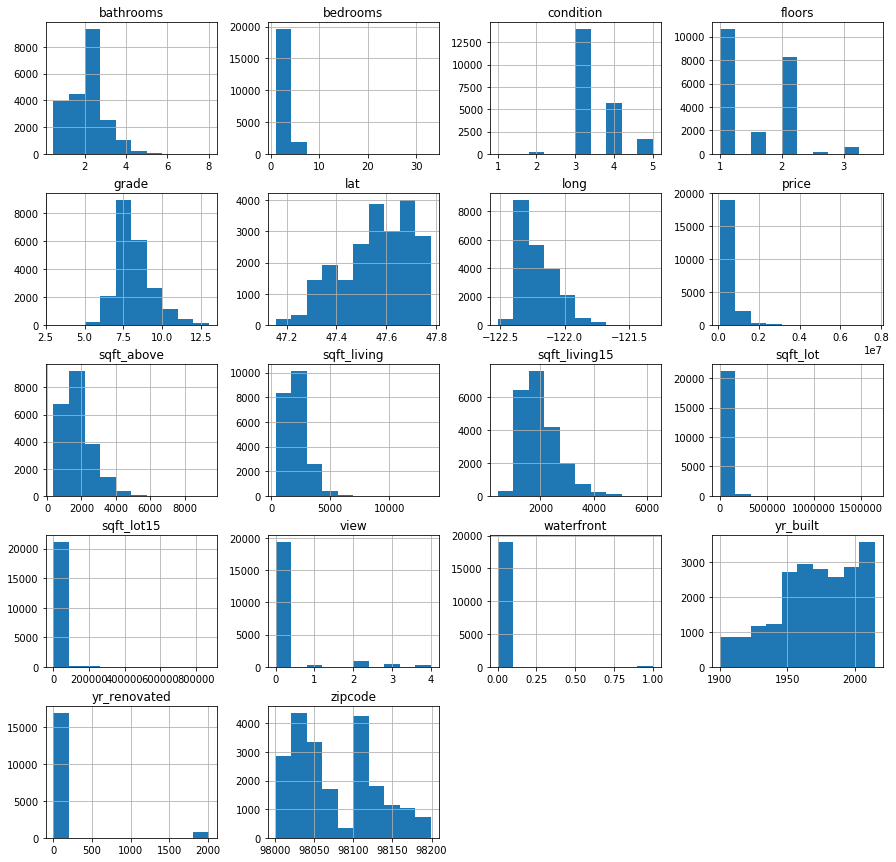

In [7]:
df.hist(figsize=(15,15));

An initial inspection reveals many of the features are categorical. The condition, floors, view, waterfront, yr_built, yr_renovated, and zipcode all seem categorical. I was a bit unclear on grade, but some research on the King County property assessment website reveals some detail about this feature, and it does appear to be categorical in nature.

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b

#### Building Grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 



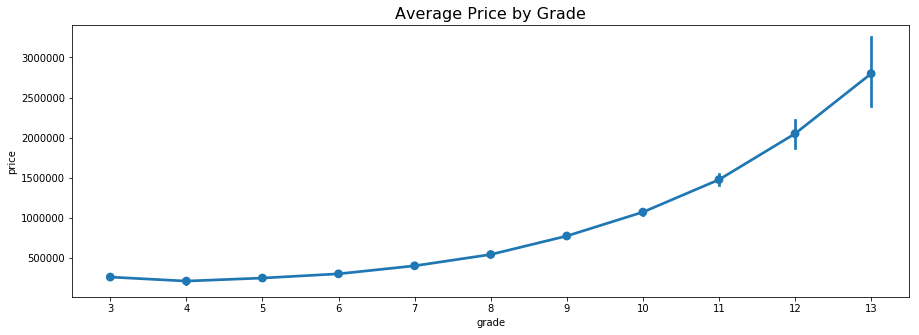

In [84]:
df_grade = df[['grade','price']].copy()

#plot by grade
    
plt.figure(figsize=(15,5))
sns.pointplot(df_grade.grade, df_grade.price)
plt.title('Average Price by Grade', fontdict={'fontsize': 16})
plt.show()

### Dealing with Null Values

In our initial inspection, we did notice null values visible as 'NaN' in the dataset.

In [8]:
#confirm there are nulls in dataset
df.isnull().values.any()

True

We can check which specific features have null values.

In [9]:
#check what features have missing/null data
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the 3 features of missing data, we can check what percentage of each feature is null. If there is a signficant percentage of nulls in a feature, further analysis is required on how to handle the nulls.

In [10]:
print(df['waterfront'].value_counts())
print('\n')
print(df['view'].value_counts())
print('\n')
print(df['yr_renovated'].value_counts())

0.00    19075
1.00      146
Name: waterfront, dtype: int64


0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64


0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
2000.00       29
2005.00       29
1990.00       22
2004.00       22
2009.00       21
1989.00       20
2006.00       20
2002.00       17
1991.00       16
1998.00       16
1984.00       16
1999.00       15
2008.00       15
2010.00       15
2001.00       15
1983.00       15
2015.00       14
1985.00       14
1986.00       14
1987.00       14
1994.00       14
1992.00       13
1993.00       12
1997.00       12
1995.00       12
           ...  
1975.00        5
1964.00        5
1969.00        4
1963.00        4
1973.00        4
1981.00        4
1965.00        4
1978.00        3
1960.00        3
1958.00        3
1956.00        3
1955.00        3
1945.00        3
1972.00        3
1967.00        2
1957.00        2
1940.00        2
1974.00        2
1962.00  

In [11]:
#check percentage of missing nulls
#check how many unique values in feature - examine if categorical
print('Percentage of Null Waterfront Values:', len(df[df.waterfront.isna()])/ len(df)) #formula null waterfront over total
print('Number of Unique Waterfront Values:', df.waterfront.nunique())
print('\n')
print('Percentage of Null View Values:', len(df[df.view.isna()])/ len(df))
print('Number of Unique View Values:', df.view.nunique())
print('\n')
print('Percentage of Null Year Renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique Year Renovated Values:', df.yr_renovated.nunique())

Percentage of Null Waterfront Values: 0.11001527989998611
Number of Unique Waterfront Values: 2


Percentage of Null View Values: 0.0029170718155299346
Number of Unique View Values: 5


Percentage of Null Year Renovated Values: 0.17789507802009538
Number of Unique Year Renovated Values: 70


##### View
Most of the data have 0 view (count of 19422) and only 0.2% of the data have nulls in the View feature. From earlier inspection, we are thinking that this feature is categorical. Because there are so few nulls, we can opt to drop the rows with nulls. 

In [12]:
df.dropna(axis=0, subset=['view'], inplace=True)

##### Waterfront
Waterfront is missing 11% of the data. From the .describe function, we see that waterfront appears to be categorical, specifically boolean (true/false category). Either you have a view or you don't. From looking at the data, we see most of the properties have no waterfront view. Only 146 properties are designated waterfront. For modeling purposes, we can set the nulls to 0.

In [13]:
df['waterfront'].replace(np.nan,0,inplace=True)

##### Year Renovated
Year Renovated is missing 17.8% of the data, which is a significant amount. For modeling purposes and to be conservative, we can replace the nulls in this feature with 0 to designate the house was not renovated.

In [14]:
df['yr_renovated'].replace(np.nan,0,inplace=True)

We can double check that there are no null values.

##### Sq Ft Basement

In [15]:
print('Percentage of Null Year Renovated Values:', len(df[df['sqft_basement'] == '?'])/ len(df))
print('Number of Unique Year Renovated Values:', df.yr_renovated.nunique())

Percentage of Null Year Renovated Values: 0.02099006222717563
Number of Unique Year Renovated Values: 70


In this feature, we see 452 counts of '?' values. This is not a significant amount, and we can opt to drop these rows.

In [16]:
#drop by including only rows where the values do not equal '?'
df = df[df.sqft_basement != '?']

In [17]:
#check that our nulls have been replaced
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Questions

Here, I'd like to pose questions in exploring the data.

1. Do waterfront properties sell for more?
2. Does the time of year impact the price? - We can convert the date feature and make use of it.
3. Are there certain zipcodes that are more expensive?

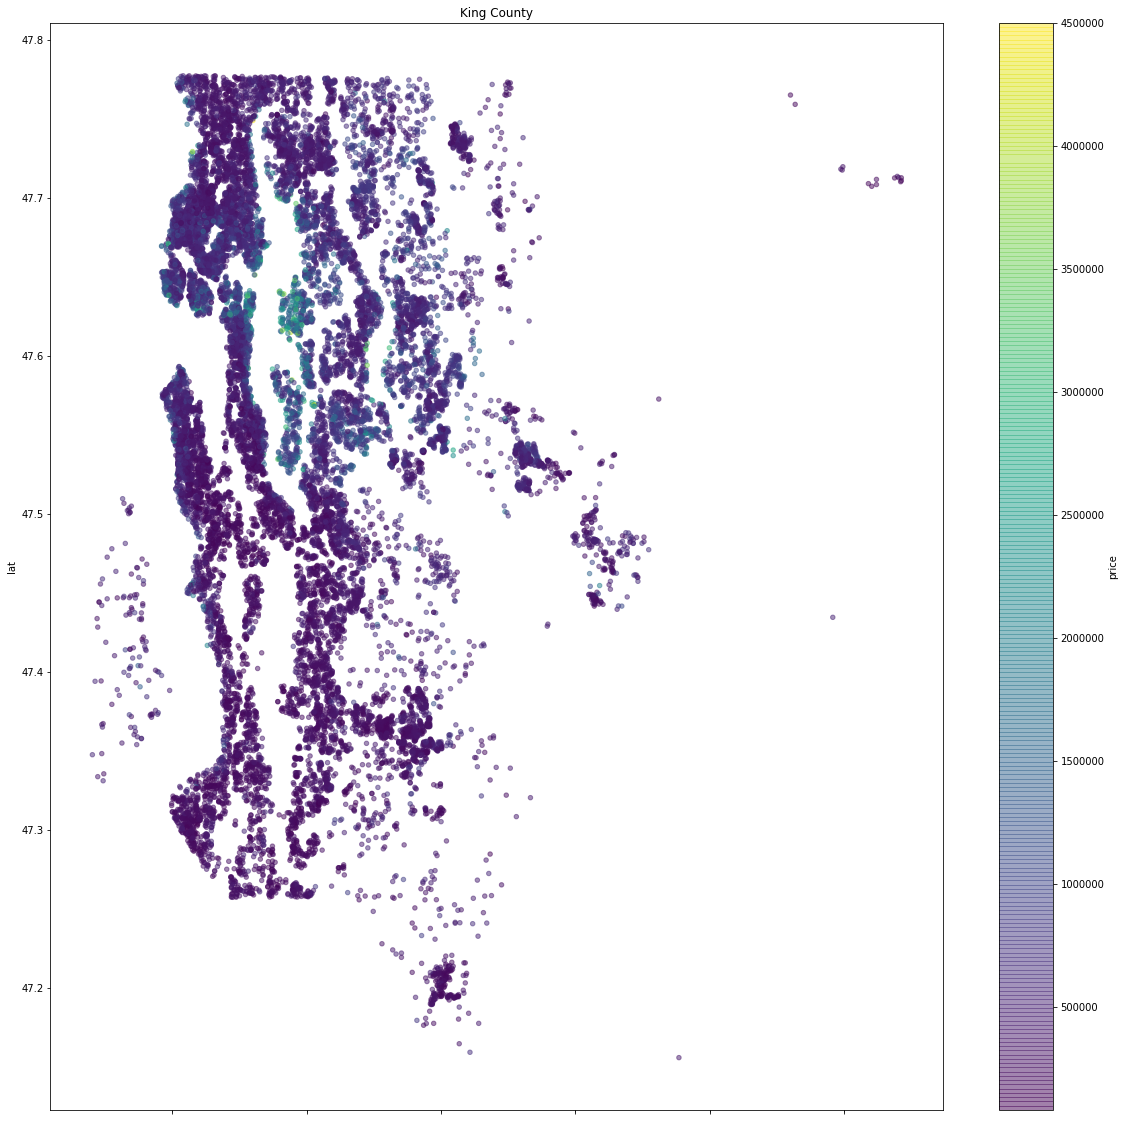

In [54]:
# scatter plot of King County by longitude and latitude
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
df.plot(kind='scatter', x='long', y='lat', alpha=.5, figsize=(20,20), c='price', cmap='viridis', title='King County', legend='True');

From the map above, we can see that houses near the water generally have a higher price.

### Converting Datatypes

Right off the bat, we can convert the date feature to a datetime datatype that will allow pandas to manipulate. We can also create a list of categorical features that will allow us to loop through and change the datatype of these columns. Also, now that we have removed the '?' rows in sqft_basement, we can convert this feature into an integer.

In [57]:
df.date = pd.to_datetime(df.date)  #convert date to datetime

cat_feat = ['condition', 'floors', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'grade'] #create list to run for loops

#convert to categorical
for i in cat_feat:
    df[i] = df[i].astype('category')

#convert to float then to integer
df.sqft_basement = df.sqft_basement.astype('float')
df.sqft_basement = df.sqft_basement.astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null int64
yr_built         21082 non-null category
yr_renovated     21082 non-null category
zipcode          21082 non-null category
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(8), float64(4), int64(7), object(1)
memory usage: 2.3+ MB


#### Sales by Month

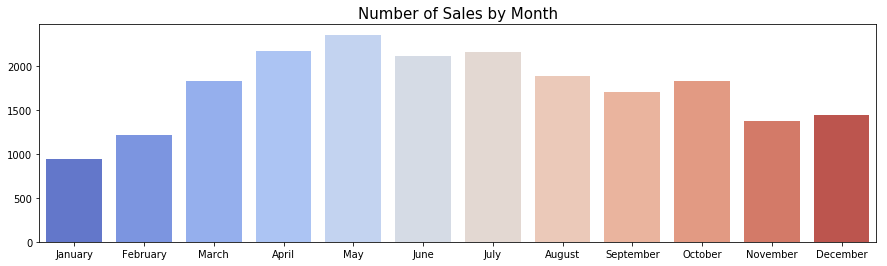

In [78]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
sales = []

for i in range(1,13):
    sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(15,4))
sns.barplot(month, sales, palette='coolwarm')
plt.title('Number of Sales by Month', fontdict={'fontsize': 15})
plt.show()

Generally, it looks like the warmer months are better for home sales.

#### Zipcodes

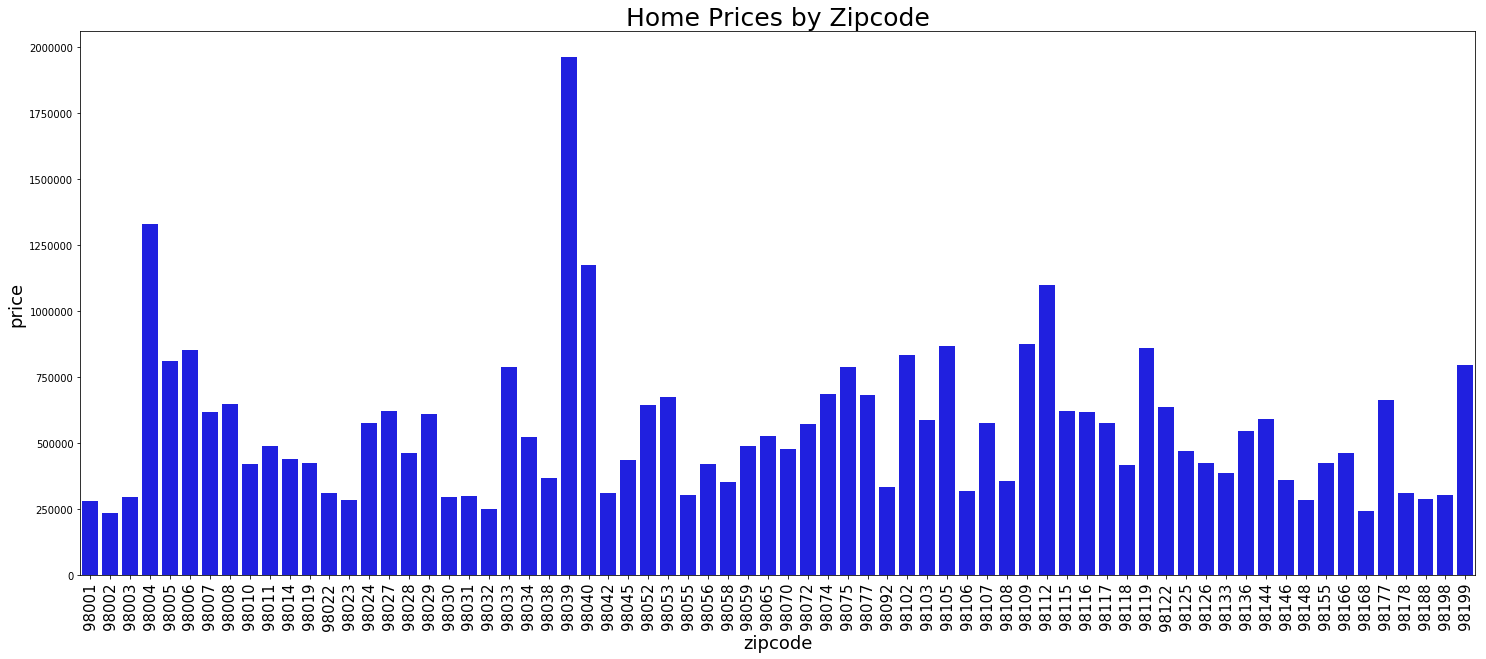

In [72]:
f, ax = plt.subplots(figsize = (25, 10))
sns.barplot(df['zipcode'], df['price'], ci = False, color = 'blue')

plt.xticks(fontsize=15, rotation = 90) # rotate x labels
plt.title('Home Prices by Zipcode', fontsize = 25)
plt.xlabel('zipcode', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()

It does appear that certain zipcodes are more expensive than others. The two most expensive zipcodes are 98039 and 98004.

### Outliers

Plotting the numerical features, we definitely see some outliers that are going to skew our model if we don't deal with them.

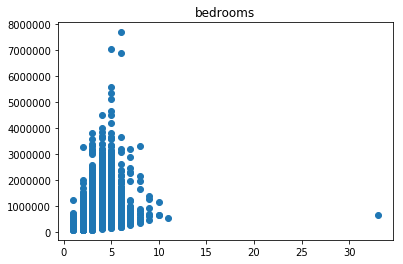

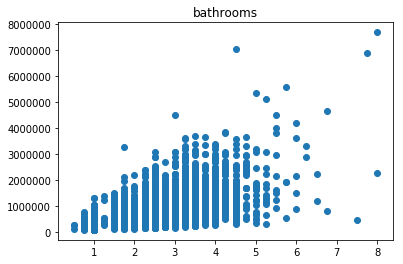

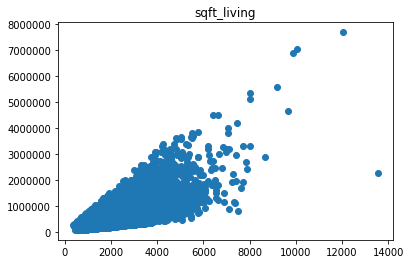

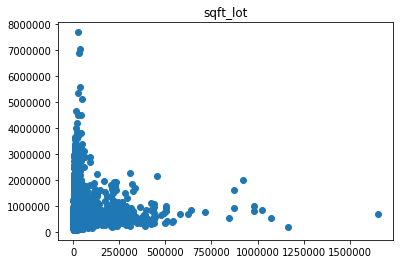

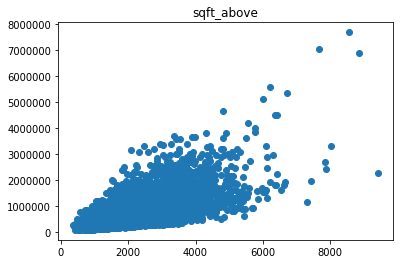

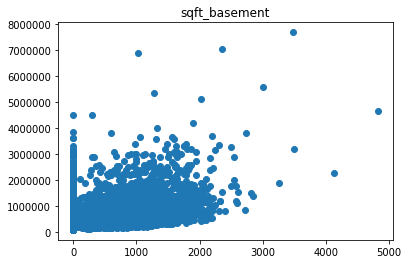

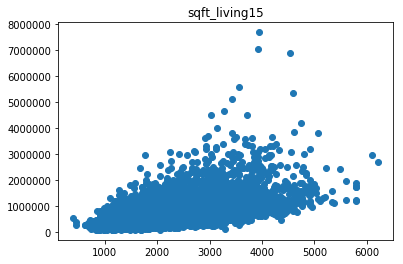

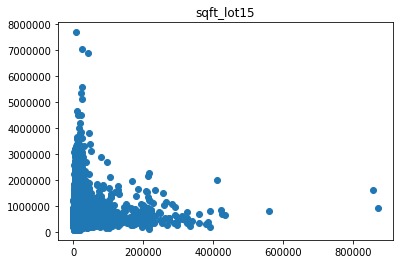

In [20]:
num_feat = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in num_feat:
    plt.scatter(df[col], df.price, label=col)
    plt.title(col)
    plt.show()

Let's look at the outlier of 33 bedrooms that really stands out.

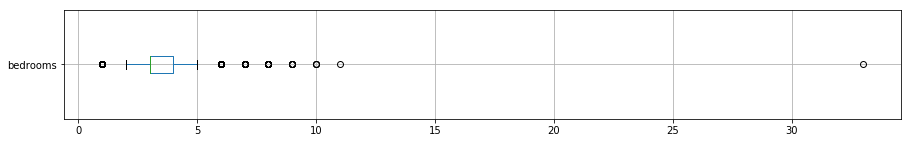

In [21]:
df.boxplot(column = 'bedrooms', vert=False, figsize=(15,2))

In [22]:
df.loc[df.bedrooms == 33] #pull record where bedrooms = 33

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,6/25/2014,640000.00,33,1.75,1620,6000,1.00,0.00,0.00,5,7,1040,580,1947,0.00,98103,47.69,-122.33,1330,4700


The 33 bedrooms looks like a  mis-key of 3 bedrooms. Instead of dropping this record, we can replace 33 with 3.

In [23]:
df.loc[df.bedrooms == 33,'bedrooms'] = 3 #replace where bedrooms = 33

In [24]:
# Removing rest of outliers from dataset
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 500000]
df = df[df.sqft_basement < 3500]
df = df[df.sqft_above < 8000]
print('Remaining row count:',len(df))

Remaining row count: 21051


### Multicolinearity

Let's explore the independent variables that affect sales price.

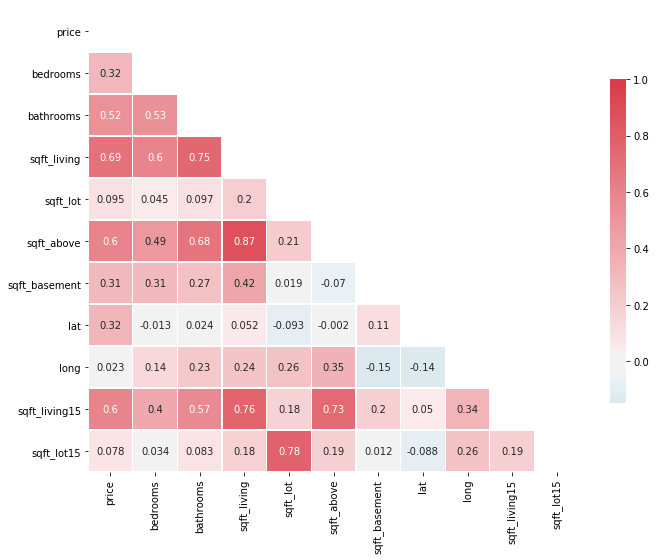

In [25]:
#analyzing multicolinearity
#check correlation
import seaborn as sns

corr = df.corr() # covariance matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 8.5))
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(round(df.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0,
            linewidth=0.3, cmap=colormap);

In [26]:
#checking for correlation greater than .75 or -.75
abs(df.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,True
sqft_above,False,False,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,True,False,False,False,False,False,True,False


The 4 highest correlations greater than the .75 threshold we should consider are between:
    1. sqft_above and sqft_living (.87)
    2. sqft_lot and sqft_lot15 (.78)
    3. sqft_living and sqft_living15 (.76)
    4. sqft_living and bathrooms (.75)

With regard to price, the features we should drop are probably sqft_above, sqft_lot15, sqft_living15, and bathrooms. These features correlate less with price.

In [27]:
#drop highly correlated features
df.drop(['sqft_above', 'sqft_lot15', 'sqft_living15', 'bathrooms'],axis=1,inplace=True)

## Explore

Let's explore our model with kde plots and jointplots, to look for linear relationships and see how normal they are.

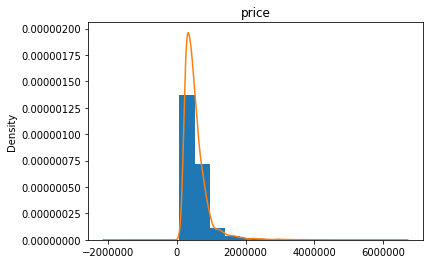

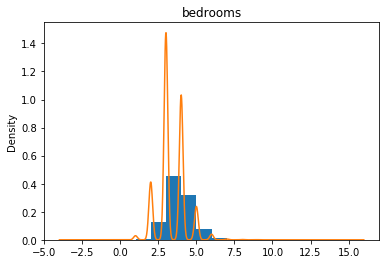

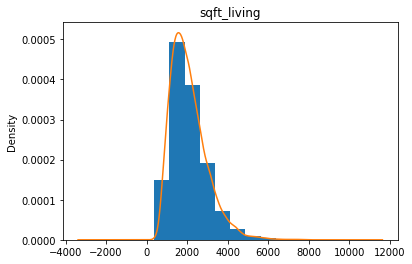

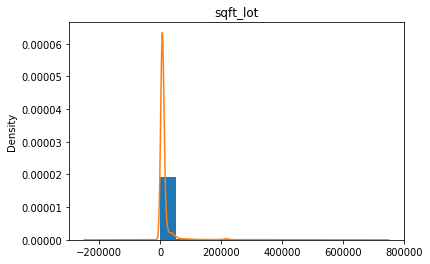

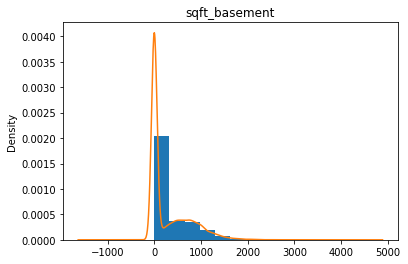

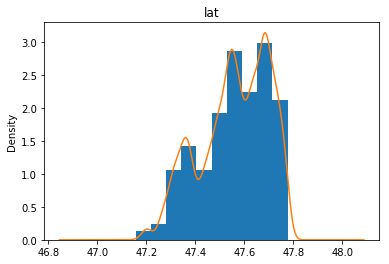

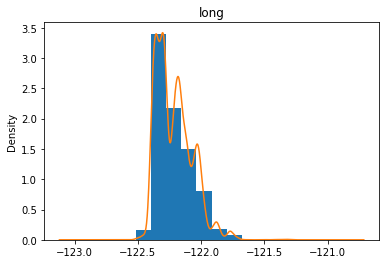

In [28]:
for col in df.select_dtypes(include=['int64','float64']): #include only numerical datatypes
    df[col].plot.hist(density=True,label=col)
    df[col].plot.kde(label=col)
    plt.title(col)
    plt.show()

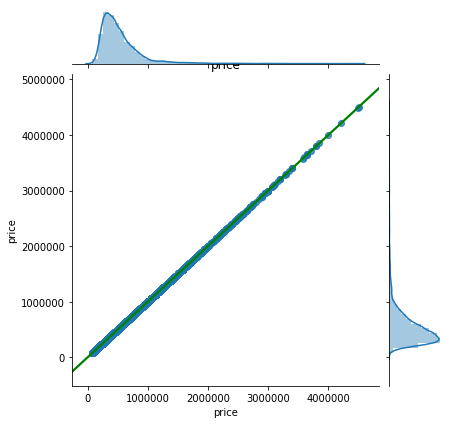

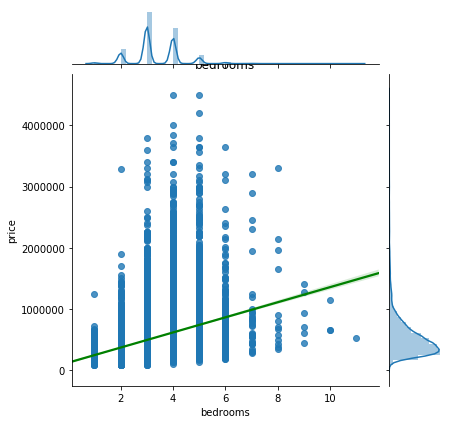

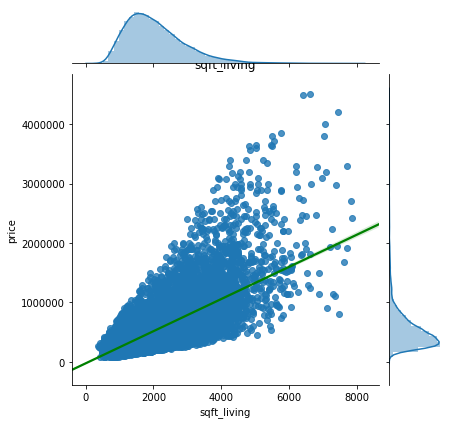

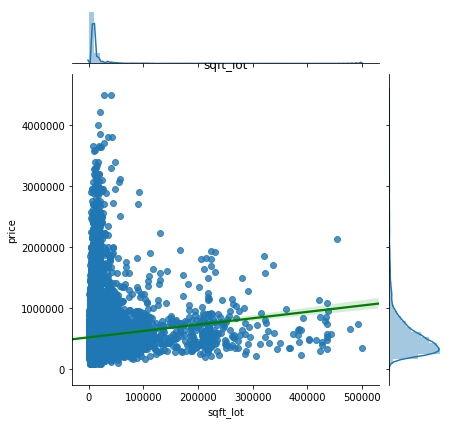

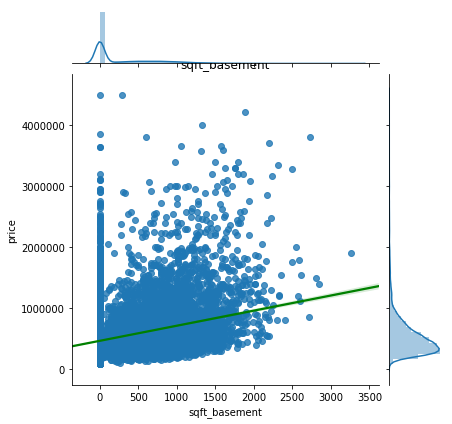

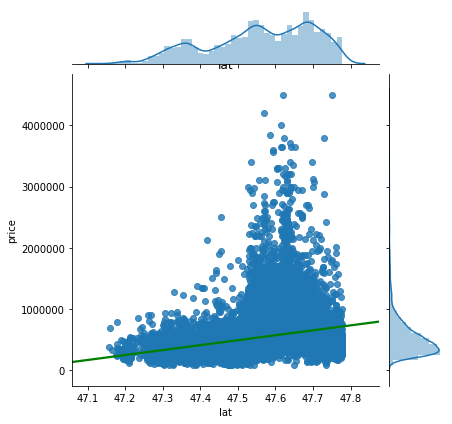

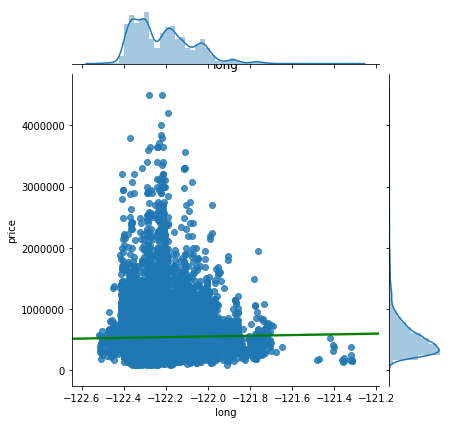

In [29]:
#jointplots
for col in df.select_dtypes(include=['int64','float64']):
    sns.jointplot(x=col, y="price",
                  data=df, 
                  kind='reg', 
                  label=col,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.title(col)
    plt.show()

From the join plots, we see most of these relationships are linear, but skewed so we should transform and scale the data. We can split the dataframe into two by categorical and numeric.

In [30]:
df.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,10/13/2014,221900.00,3,1180,5650,1.00,0.00,0.00,3,7,0,1955,0.00,98178,47.51,-122.26
1,12/9/2014,538000.00,3,2570,7242,2.00,0.00,0.00,3,7,400,1951,1991.00,98125,47.72,-122.32
2,2/25/2015,180000.00,2,770,10000,1.00,0.00,0.00,3,6,0,1933,0.00,98028,47.74,-122.23
3,12/9/2014,604000.00,4,1960,5000,1.00,0.00,0.00,5,7,910,1965,0.00,98136,47.52,-122.39
4,2/18/2015,510000.00,3,1680,8080,1.00,0.00,0.00,3,8,0,1987,0.00,98074,47.62,-122.05


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21051 entries, 0 to 21596
Data columns (total 16 columns):
date             21051 non-null object
price            21051 non-null float64
bedrooms         21051 non-null int64
sqft_living      21051 non-null int64
sqft_lot         21051 non-null int64
floors           21051 non-null category
waterfront       21051 non-null category
view             21051 non-null category
condition        21051 non-null category
grade            21051 non-null category
sqft_basement    21051 non-null int64
yr_built         21051 non-null category
yr_renovated     21051 non-null category
zipcode          21051 non-null category
lat              21051 non-null float64
long             21051 non-null float64
dtypes: category(8), float64(3), int64(4), object(1)
memory usage: 1.6+ MB


Here, I am going to split my dataframe by numberical and categorical features. I am not including the date, since this will not provide predictive value in our model. Similarly, I am not including latitude and longitude as the location can also be provided by zipcode.

In [32]:
df_cat = df[['floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']].copy()
df_num = df[['price', 'sqft_living', 'sqft_lot', 'sqft_basement']]

## Modeling

##### Log
We will perform a log on the skewed numeric data (price, sqft_living, sqft_lot, sqft_basement) to normalize before modeling. Since there are 0 values in sqft_basement that will cause our log to be undefined, we can shift that feature by adding 1 before our log transformation.

In [33]:
df_log = df_num.copy()

In [34]:
df_log.head()

,price,sqft_living,sqft_lot,sqft_basement
0,221900.00,1180,5650,0
1,538000.00,2570,7242,400
2,180000.00,770,10000,0
3,604000.00,1960,5000,910
4,510000.00,1680,8080,0


In [35]:
df_log['price'] = np.log(df_log['price'])
df_log['sqft_living'] = np.log(df_log['sqft_living'])
df_log['sqft_lot'] = np.log(df_log['sqft_lot'])
df_log['sqft_basement'] = np.log(df_log['sqft_basement']+1) #https://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe

Let's look at the distributions again.

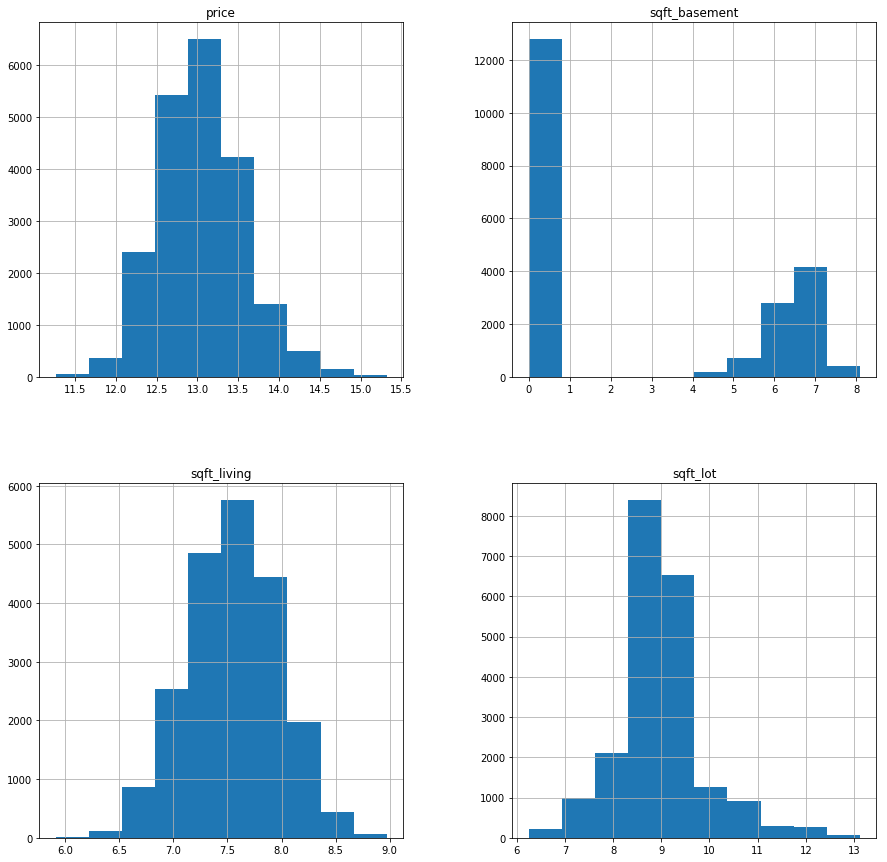

In [36]:
df_log.hist(figsize=(15,15));

##### Scaling
Now that our features are more normalized, we will scale our numeric data so we can compare features better.

In [37]:
# minmax scaling: from dsc-1-11-09
price = df_log['price']
sqft_basement = df_log['sqft_basement']
sqft_living = df_log['sqft_living']
sqft_lot = df_log['sqft_lot']

df_log['price'] = (price-min(price))/(max(price)-min(price))
df_log['sqft_basement'] = (sqft_basement-min(sqft_basement))/(max(sqft_basement)-min(sqft_basement))
df_log['sqft_living'] = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))
df_log['sqft_lot'] = (sqft_lot-min(sqft_lot))/(max(sqft_lot)-min(sqft_lot))

##### One Hot Encoding Categorical Features

In [38]:
cat_feat

['condition',
 'floors',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'grade']

In [39]:
df_dummy = df_cat.copy()

# one-hot encoding function
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0.0,waterfront_1.0,view_0.0,view_1.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# convert dummy variables back to categories
for col in df_dummy.columns :
         df_dummy[col] = df_dummy[col].astype('category')

We can combine our two dataframes again (df_dummy and df_log).

In [41]:
df_comb = pd.concat([df_dummy, df_log], axis=1, sort=False)

In [42]:
df_comb.dtypes.head(10)

floors_1.0        category
floors_1.5        category
floors_2.0        category
floors_2.5        category
floors_3.0        category
floors_3.5        category
waterfront_0.0    category
waterfront_1.0    category
view_0.0          category
view_1.0          category
dtype: object

#### Train Test Split
This helps make sure that the model has good predictive value. We compare the training set (used to fit and tune our model) against the test set.

In [43]:
# 25-75 train-test-split
from sklearn.model_selection import train_test_split

y = df_comb[['price']]
X = df_comb.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15788 5263 15788 5263


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# fit a model to the training data (leave testing data alone)
# use sklearn instead of statsmodel - easier 

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print(train_mse)
print(test_mse)

0.00189182082461905
5.124083376066589e+18


#### Cross Validation

Cross validation further validates and helps us tune our model.

In [46]:
from sklearn.model_selection import cross_val_score

cv_10_results = (cross_val_score(linreg, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
cv_10_results

array([-3.12071724e+18, -3.88789296e+20, -2.06794917e-03, -1.84830554e+21,
       -8.39744317e+16, -1.51609953e+19, -8.69013122e+17, -1.09696286e+16,
       -1.84792848e-03, -1.87133175e-03])

In [48]:
import statsmodels.api as sm

X_fin = X.astype(float)
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     579.5
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:26:06   Log-Likelihood:                 36089.
No. Observations:               21051   AIC:                        -7.162e+04
Df Residuals:                   20771   BIC:                        -6.939e+04
Df Model:                         279                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.294e+10   1.58e+10      1.455      0.146   -7.96e+09    5.38e+10
floors_1.0           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
floors_1.5           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
floors_2.0           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
floors_2.5           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
floors_3.0           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
floors_3.5           -4.85e+10   3.33e+10     -1.455      0.146   -1.14e+11    1.68e+10
waterfront_0.0        4.27e+10   2.93e+10      1.455      0.146   -1.48e+10       1e+11
waterfront_1.0        4.27e+10   2.93e+10      1.455      0.146   -1.48e+10       1e+11
view_0.0            -1.568e+10   1.08e+10     -1.455      0.146   -3.68e+10    5.44e+09
view_1.0            -1.568e+10   1.08e+10     -1.455      0.146   -3.68e+10    5.44e+09
view_2.0            -1.568e+10   1.08e+10     -1.455      0.146   -3.68e+10    5.44e+09
view_3.0            -1.568e+10   1.08e+10     -1.455      0.146   -3.68e+10    5.44e+09
view_4.0            -1.568e+10   1.08e+10     -1.455      0.146   -3.68e+10    5.44e+09
condition_1         -7.115e+09   4.89e+09     -1.455      0.146   -1.67e+10    2.47e+09
condition_2         -7.115e+09   4.89e+09     -1.455      0.146   -1.67e+10    2.47e+09
condition_3         -7.115e+09   4.89e+09     -1.455      0.146   -1.67e+10    2.47e+09
condition_4         -7.115e+09   4.89e+09     -1.455      0.146   -1.67e+10    2.47e+09
condition_5         -7.115e+09   4.89e+09     -1.455      0.146   -1.67e+10    2.47e+09
grade_3              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_4              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_5              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_6              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_7              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_8              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_9              3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_10             3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_11             3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_12             3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
grade_13             3.829e+09   2.63e+09      1.455      0.146   -1.33e+09    8.99e+09
yr_built_1900        4.374e+08   3.01e+08      1.455      0.146   -1.52e+08    1.03e+09
yr_built_1901        4.374e+08   3.01e+08      1.455      0.146   -1.52e+08    1.03e+09
yr_

## Interpreting

Our model includes an R-squared value of .886, indicating that 88.6% of the variance in price can be explained by this model. The initial predictors were not uniform and skewed. In the final model, we transformed the most useful predictors to a more Gaussian-like distribution. After normalization, our model thus has a better MSE.

The most useful predictors had a high correlation with price, per our multicolinearity test.